In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,5)

params={'legend.fontsize':'18','axes.labelsize':'18',
        'axes.titlesize':'18','xtick.labelsize':'18',
        'ytick.labelsize':'18','lines.linewidth':2,
        'axes.linewidth':2,'animation.html': 'html5',
        'figure.figsize':(8,6)}
plt.rcParams.update(params)
plt.rcParams.update({'figure.max_open_warning': 0})
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

import scipy.io as sio

from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)
cosmo.age(1)

import seaborn as sns
import pandas as pd
from astropy.io import fits

sns.set(font_scale=2)
sns.set_style("whitegrid")

from matplotlib import pyplot as plt

import statsmodels.api as sm
lowess = sm.nonparametric.lowess

import joypy

# Step 1: import catalogs and galaxy IDs [and flags]

In [2]:
warnings.filterwarnings('ignore')

candels_cat_z1 = np.loadtxt('../catalogs/CANDELS_GDSS_workshop_z1.dat')

# subtracting 1 from the ID for python indexing
cat_z1_ids = candels_cat_z1[0:,0] - 1
cat_z1_z = candels_cat_z1[0:,1]

print(str(cat_z1_z.shape[0])+' galaxies in the z~1 catalog.')

ircat = np.genfromtxt('../catalogs/CANDELS_GDSS_workshop_z1_fluxes_Jy_UVtoIR.dat')
print(ircat.shape)

# ID      zz                   1
# CTIO_U             eCTIO_U    3        
# VIMOS_U            eVIMOS_U    5       
# ACS_F435W          eACS_F435W   7      
# ACS_F606W          eACS_F606W    9     
# ACS_F775W          eACS_F775W     11    
# ACS_F814W          eACS_F814W      13   
# ACS_F850LP         eACS_F850LP       15 
# WFC3_F098M   eWFC3_F098M   17
# WFC3_F105W         eWFC3_F105W 19       
# WFC3_F125W         eWFC3_F125W   21     
# WFC3_F160W         eWFC3_F160W     23   
# ISAAC_KS           eISAAC_KS         25 
# HAWKI_KS           eHAWKI_KS          27
# IRAC_CH1           eIRAC_CH1          29
# IRAC_CH2           eIRAC_CH2          31
# IRAC_CH3           eIRAC_CH3          33
# IRAC_CH4           eIRAC_CH4          35
# f24            ef24           37
# f70            ef70           39
# f100           ef100          41
# f160           ef160          43
# f250           ef250          45
# flg1   flg2  47


371 galaxies in the z~1 catalog.
(371, 48)


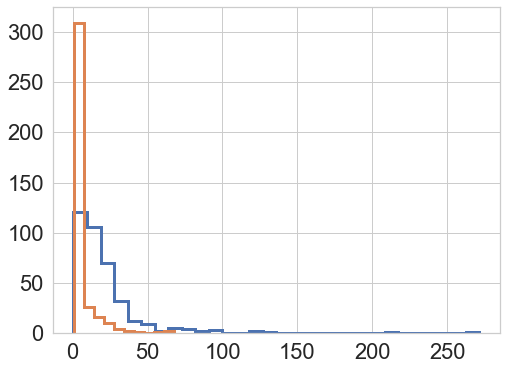

In [3]:
f435_snr = ircat[0:,6]/ircat[0:,7]
f24_snr = ircat[0:,36]/ircat[0:,37]
f100_snr = ircat[0:,40]/ircat[0:,41]
plt.hist(f435_snr,30,histtype='step',lw=3)
plt.hist(f24_snr,10,histtype='step',lw=3)
# plt.hist(f100_snr,50,histtype='step',lw=3)
plt.show()

In [4]:
thrs = 3
print(np.sum((f24_snr>thrs) & (f100_snr>thrs)))
print(np.sum((f24_snr>thrs)))
print(np.sum(f24_snr>0))

63
107
371


# Step 2: import outputs of all the SED fitting codes.

In [5]:
%run import_IR_fits_2020.py


importing BAGPIPES files from Mar 11, 2019
imported CIGALE files (z=1 fits from Oct 2020, z=3 fits from 27 Feb 2019)


# Step 3: Take everyone's data and put it in a dataframe, then start the visualization and analysis.

## define dataframes below for Mass, SFR and dust at z~1. Change the dictionary labels here to change the x-tick labels in the violin- and box-plots.

## change 24 micron SNR threshold by changing [thrs], default = 3

In [6]:
thrs = 3
#mask = (f24_snr>thrs) & (f100_snr>thrs)
mask = (f24_snr>thrs) 

# 'MAGPHYS (no IR, w/AGN)': magphys_mass_z1_wagn[mask],


z1_cat_mass_dict = {'AGNFitter': agnfitter_mass[mask],
                    'BAGPIPES':bagpipes_mass_z1[mask],
                    'BAGPIPES wIR':bagpipes_IR_mass[mask],
                    'CIGALE': cigale_mass[mask],
                    'CIGALE wIR': cigale_ir_mass[mask],
                    'CIGALE wIR, wAGN': cigale_ir_agn_mass[mask],
                    'MAGPHYS': magphys_mass_z1[mask],
                    'MAGPHYS wIR': magphys_ir_mass[mask],
                    'MAGPHYS wIR, wAGN': magphys_ir_mass_AGN[mask],
                    'Prospector':prospector_mass_z1[mask], 
                    'Prospector wIR':prospector_mass_z1_IR[mask],
                    'Prospector wIR, wAGN':prospector_mass_z1_IR_AGN[mask],
                    'SED3FIT':sed3fit_mass[mask],
                    'SED3FIT wIR':sed3fit_ir_mass[mask]
                   }
z1_cat_mass = pd.DataFrame(data=z1_cat_mass_dict)

z1_cat_mass[z1_cat_mass < 7] = np.nan


z1_cat_sfr_dict = {'AGNFitter': agnfitter_sfr[mask],
                    'BAGPIPES':bagpipes_sfr_z1[mask],
                    'BAGPIPES wIR':bagpipes_IR_sfr[mask],
                    'CIGALE': cigale_sfr[mask],
                    'CIGALE wIR': cigale_ir_sfr[mask],
                    'CIGALE wIR, wAGN': cigale_ir_agn_sfr[mask],
                    'MAGPHYS': magphys_sfr_z1[mask],
                    'MAGPHYS wIR': magphys_ir_sfr[mask],
                    'MAGPHYS wIR, wAGN': magphys_ir_sfr_AGN[mask],
                    'Prospector':prospector_sfr_z1[mask], 
                    'Prospector wIR':prospector_sfr_z1_IR[mask],
                    'Prospector wIR, wAGN':prospector_sfr_z1_IR_AGN[mask],
                    'SED3FIT':sed3fit_sfr[mask],
                    'SED3FIT wIR':sed3fit_ir_sfr[mask]
                   }
z1_cat_sfr = pd.DataFrame(data=z1_cat_sfr_dict)

z1_cat_sfr[z1_cat_sfr < -3] = np.nan


z1_cat_av_dict = {'AGNFitter': agnfitter_av[mask],
                    'BAGPIPES':bagpipes_Av_z1[mask],
                    'BAGPIPES wIR':bagpipes_IR_av[mask],
                    'CIGALE': cigale_Av[mask],
                    'CIGALE wIR': cigale_ir_Av[mask],
                    'CIGALE wIR, wAGN': cigale_ir_agn_Av[mask],
                    'MAGPHYS': magphys_Av_z1[mask],
                    'MAGPHYS wIR': magphys_ir_av[mask],
                    'MAGPHYS wIR, wAGN': magphys_ir_av_AGN[mask],
                    'Prospector':prospector_Av_z1[mask], 
                    'Prospector wIR':prospector_Av_z1_IR[mask],
                    'Prospector wIR, wAGN':prospector_Av_z1_IR_AGN[mask],
                    'SED3FIT':sed3fit_av[mask],
                    'SED3FIT wIR':sed3fit_ir_av[mask]
                   }
z1_cat_av = pd.DataFrame(data=z1_cat_av_dict)

z1_cat_av[z1_cat_av < 0] = np.nan





# make (and save) plots: 

# z=1 | M$_*$, SFR, A$_V$ distribution for fits with FIR data [violin plots]

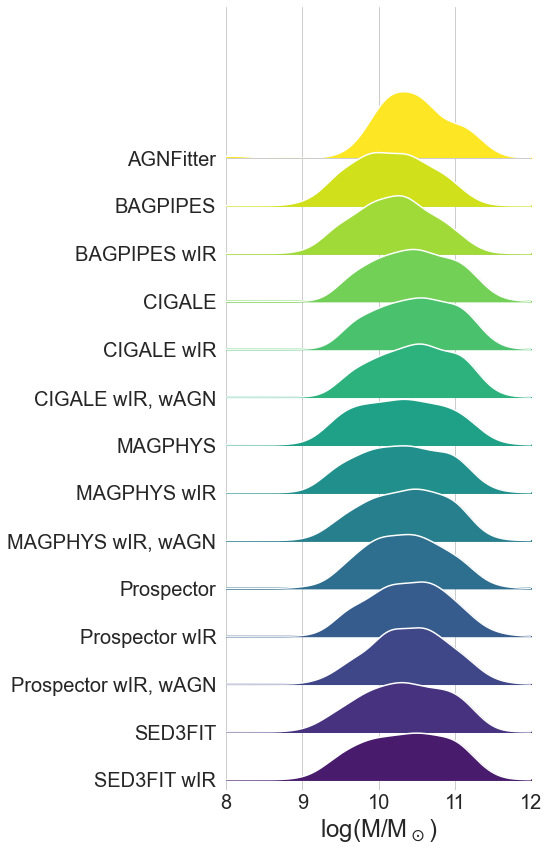

In [15]:
fig, axes = joypy.joyplot(data = z1_cat_mass,linecolor='w',ylabels=True, xlabelsize=20, ylabelsize=20,
                        figsize=(8,12),grid=True,yrot=0,colormap=matplotlib.cm.viridis_r)
for i in range(len(axes)):
    tempy = axes[i].set_ylim()
    axes[i].set_ylim(tempy[0],tempy[1]+1.0)
    axes[i].set_xlim(8,12)
plt.xlabel(r'log(M/M$_\odot$)')

plt.savefig("../figures/fig5_distrib_z1_ir_mass.png", dpi=600, bbox_inches='tight')

plt.show()

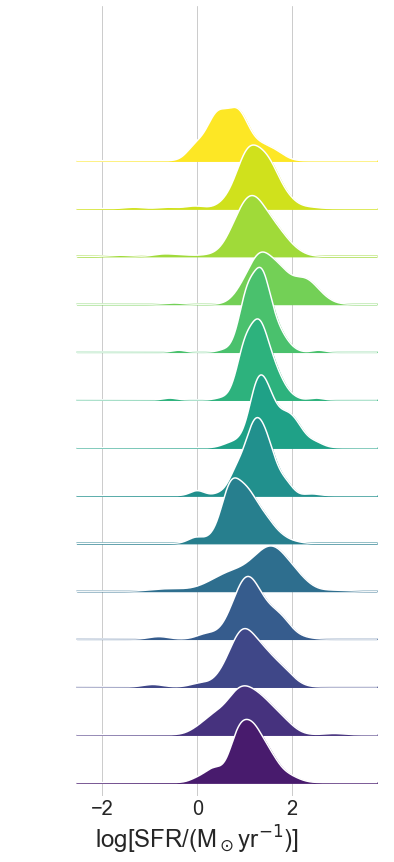

In [16]:
fig, axes = joypy.joyplot(data = z1_cat_sfr,linecolor='w',ylabels=False, xlabelsize=20, ylabelsize=20,
                        figsize=(6,12),grid=True,yrot=0,colormap=matplotlib.cm.viridis_r)
for i in range(len(axes)):
    tempy = axes[i].set_ylim()
    axes[i].set_ylim(tempy[0],tempy[1]+1.0)
    axes[i].set_xlim(-4,4)
plt.xlabel(r'log[SFR/(M$_\odot$yr$^{-1}$)]')

plt.savefig("../figures/fig5_distrib_z1_ir_sfr.png", dpi=600, bbox_inches='tight')
plt.show()

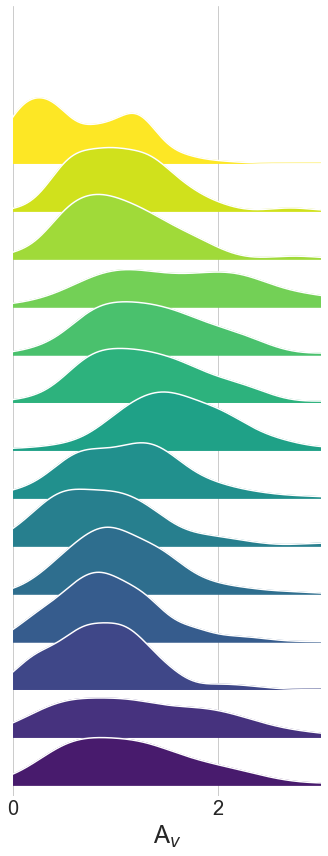

In [17]:
fig, axes = joypy.joyplot(data = z1_cat_av,linecolor='w',ylabels=False, xlabelsize=20, ylabelsize=20,
                        figsize=(5,12),grid=True,yrot=0,colormap=matplotlib.cm.viridis_r)
for i in range(len(axes)):
    tempy = axes[i].set_ylim()
    axes[i].set_ylim(tempy[0],tempy[1]+1.0)
    axes[i].set_xlim(0,3)
plt.xlabel('A$_v$')

plt.savefig("../figures/fig5_distrib_z1_ir_av.png", dpi=600, bbox_inches='tight')
plt.show()